<a href="https://colab.research.google.com/github/RajBorse91/DataVisualization_Session_Ass/blob/main/Ass1_habermans_survival_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(*Exploratory Data Analysis*) on the Haberman's survival data **set**

**Haberman’s dataset** contains data from a study conducted at the University of Chicago’s Billings Hospital between the years 1958 to 1970 for *patients who underwent surgery for breast cancer.*

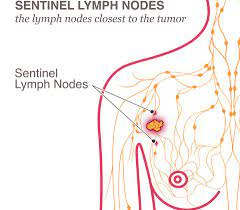

the motive behind this analysis would be to predict the chances of survival of a cancer patient.

In [ ]:
#To begin, we need to import some of the python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
haberman = pd.read_csv("haberman.csv")
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
#updating column names
column_names = ["age","op_year","axil_nodes","Surv_status"]
'''
where,
      age - Age of patient at time of operation (numerical)
      op_year - Patient's year of operation (year - 1900, numerical)
      axil_nodes - Number of positive axillary nodes detected (numerical)
      surv_status - Survival status (class attribute)
          1 = the patient survived 5 years or longer
          2 = the patient died within 5 year
'''
haberman.columns = column_names

In [ ]:
haberman.shape

(305, 4)

In [ ]:
haberman.head(15)

,age,op_year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [ ]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          305 non-null    int64
 1   op_year      305 non-null    int64
 2   axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


the data set contains only numeric values and also its has 0 null values

In [ ]:
haberman.describe()

,age,op_year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
haberman['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

Count of people that survived the disease for 5 years or longer are 225 and the ones who died within 5 years are 81.

*   1 the patient survived 5 years or longer = 224
*   2 the patient died within 5 year = 81

In [ ]:
haberman['Surv_status'] = haberman['Surv_status'].map({1:"yes", 2:"no"})
#Updated survival_status
haberman["Surv_status"].value_counts()

yes    224
no      81
Name: Surv_status, dtype: int64

In [ ]:
#survival status according to all classes
print(haberman.groupby("Surv_status").count())

             age  op_year  axil_nodes
Surv_status                          
no            81       81          81
yes          224      224         224


## Analysis of Dataset through Mean, Variance and Standard deviation :

In [ ]:
#classififcation of Survival data and not Survival data
status_yes = haberman.loc[haberman["Surv_status"] == "yes"]

print("SURVIVAL STATUS : YES -> STATISTICS :")
print('-'*40,'\n')
print(status_yes.describe())

SURVIVAL STATUS : YES -> STATISTICS :
---------------------------------------- 

              age     op_year  axil_nodes
count  224.000000  224.000000  224.000000
mean    52.116071   62.857143    2.799107
std     10.937446    3.229231    5.882237
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000


*   Number of people survived : 225
*   average age of people that survived : 52
*   minimum age of people that survived : 30
*   maximum age of people that survived : 77

In [ ]:
status_no = haberman.loc[haberman["Surv_status"] == "no"]

print("SURVIVAL STATUS : NO -> STATISTICS :")
print('-'*40,'\n')
print(status_no.describe())

SURVIVAL STATUS : NO -> STATISTICS :
---------------------------------------- 

             age    op_year  axil_nodes
count  81.000000  81.000000   81.000000
mean   53.679012  62.827160    7.456790
std    10.167137   3.342118    9.185654
min    34.000000  58.000000    0.000000
25%    46.000000  59.000000    1.000000
50%    53.000000  63.000000    4.000000
75%    61.000000  65.000000   11.000000
max    83.000000  69.000000   52.000000


*   Number of people who did not survive : 81
*  average age of people who did not survive : 53
*  minimum age of people who did not survive : 34
*  maximum age of people who did not survive : 83

In [ ]:
#Median of Survival data
print("MEDIANS :\n")
print("Median age of the people who survived : ",np.median(status_yes["age"]))
print("Median age of the people who could not survive : ", np.median(status_no["age"]))
print("Median Positive axillary nodes in the people who survived : ", np.median(status_yes["axil_nodes"]))
print("Median Positive axillary nodes in the people who could not survive :  ", np.median(status_no["axil_nodes"]))
print('_'*75,'\n')

MEDIANS :

Median age of the people who survived :  52.0
Median age of the people who could not survive :  53.0
Median Positive axillary nodes in the people who survived :  0.0
Median Positive axillary nodes in the people who could not survive :   4.0
___________________________________________________________________________ 



In [ ]:
print("QUANTILES :\n")
print("Survival status : Yes")
print("AGE :",np.percentile(status_yes["age"], np.arange(0, 100, 25)))
print("NODES : ", np.percentile(status_yes["axil_nodes"], np.arange(0,100,25)))
print('-'*40)

print("Survival Status : No")
print("AGE :",np.percentile(status_no["age"], np.arange(0, 100, 25)))
print("NODES : ", np.percentile(status_no["axil_nodes"], np.arange(0,100,25)))
print('_'*75,'\n')

QUANTILES :

Survival status : Yes
AGE : [30. 43. 52. 60.]
NODES :  [0. 0. 0. 3.]
----------------------------------------
Survival Status : No
AGE : [34. 46. 53. 61.]
NODES :  [ 0.  1.  4. 11.]
___________________________________________________________________________ 



## Representation of Data on graph

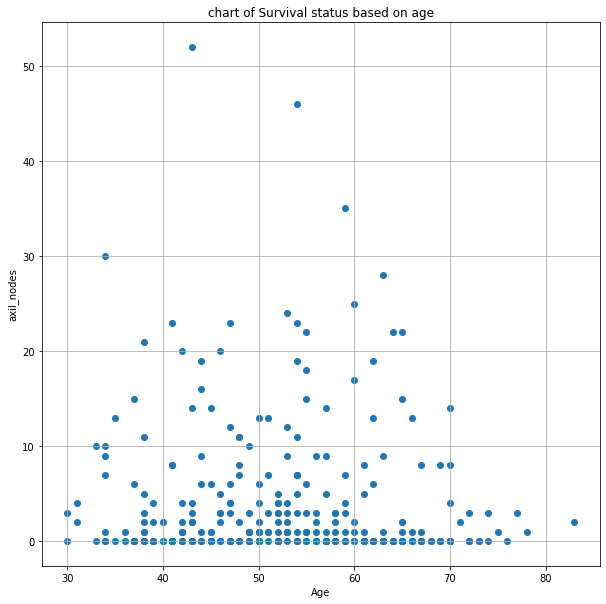

In [ ]:
#simple graph 
x = haberman.age
y = haberman.axil_nodes

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.grid()   #grid on graph

plt.title('chart of Auxil nodes based on age')  #title for graph
plt.xlabel('Age')
plt.ylabel('axil_nodes')

plt.show()

Auxillary node=0 has the highest Survival rate as shown in graph.


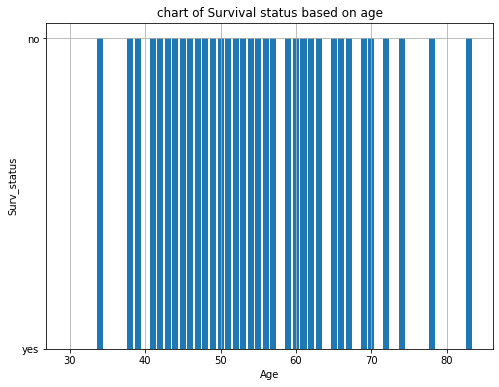

In [ ]:
x = haberman.age
y = haberman.Surv_status

plt.figure(figsize=(8,6))
plt.bar(x, y)
plt.grid()   #grid on graph

plt.title('chart of Survival status based on age')  #title for graph
plt.xlabel('Age')
plt.ylabel('Surv_status')

plt.show()

age range 40-60 have survived the most.

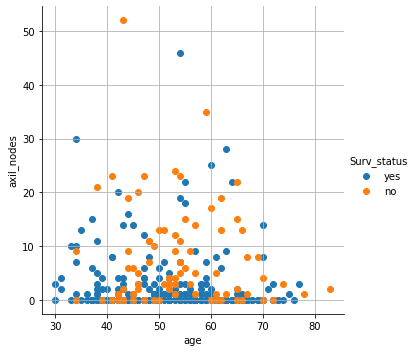

In [89]:
sns.FacetGrid(haberman, hue="Surv_status", height=5).map(plt.scatter, "age", "axil_nodes").add_legend()
plt.grid()
plt.show()

age range 50-60 have survived the most with positive axillary nodes detected 0.

## 3D scatter plot

In [91]:
#plotly for 3D scatter plot
import plotly.express as px

In [92]:
px.scatter_3d(haberman, x="age", y="axil_nodes", z="op_year", color="Surv_status")

 Given dataset is not linearly seperable.

**OBSERVATIONS :**



*   Given dataset is not linearly seperable. but we can state that the Number of positive axillary nodes detected are from 0 to 10.
*   no single value is missing in dataSet.
*   "survival_status" is integer which is[0,1] and needs to converted into valid categorical datatype.
*   age range 40-60 have survived the most.
*   Auxillary node=0 has the highest Survival rate as shown in graph.